# S8 Formulate and define a hypothesis for a research question

### What is the business problem you are trying to solve? 
##### The main goal is to determine if switching from a horizontal to a vertical media rail on the product pages will improve user engagement and sales.
### Why does it matter to the company? 
##### This change could potentially increase user engagement by improving the visibility of media content, leading to higher sales.
### What are the benefits and drawbacks of the new variant in your opinion?
##### Benefits: Enhanced user experience, potentially higher engagement rates, and increased sales.
##### Drawbacks: Possible disruption of user habits, potential layout issues, and the risk of not significantly impacting sales.

### What is the hypothesis you are trying to test? What is the null hypothesis, what is the alternative hypothesis?
##### Null Hypothesis (H0): The vertical media rail does not increase user engagement or sales compared to the horizontal rail.
##### Alternative Hypothesis (H1): The vertical media rail increases user engagement and sales compared to the horizontal rail.

### Why is an AB test a good method for testing the hypothesis?
##### It directly compares two variants (horizontal vs. vertical rails) under the same conditions, allowing us to observe the impact of this single change on user behavior.
### Propose another method that could have been used and compare pros and cons of an AB test vs this method.
##### Could include user surveys or focus groups for qualitative feedback. However, these lack the direct comparison of behavioral changes in the same way A/B testing does.
### What metrics did you select in the AB test, and why? What is the primary metric? Are there other metrics you wished you had?
##### Selected Metrics: Key metrics can include the number of page views, GMV, number of add to carts, clicks on media, and time on page. The primary metric might be the GMV or number of add to carts, as they directly relate to sales and engagement.


In [23]:
import pandas as pd

# Load the uploaded data file
data_path = r'C:\Users\emad\Desktop\assessment_math\asss.csv'


data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [24]:
# Separate the data into two groups based on the variant
group_a = data[data['Variant'] == 'A']  # Horizontal media rail
group_b = data[data['Variant'] == 'B']  # Vertical media rail

# Calculate summary statistics for each group
summary_a = group_a.describe()
summary_b = group_b.describe()

# Prepare data for visual comparison of distributions
metrics_to_compare = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

# Check the mean values for a quick comparison before detailed statistical testing
mean_comparison = pd.DataFrame({
    'Metric': metrics_to_compare,
    'Mean A': [group_a[metric].mean() for metric in metrics_to_compare],
    'Mean B': [group_b[metric].mean() for metric in metrics_to_compare],
})

mean_comparison


,Metric,Mean A,Mean B
0,Number of page views,4.98500,5.31700
1,GMV (in $),7.68999,9.28953
2,Number of add to cart,1.88400,2.46900
3,Clicks on media,1.49500,1.32400
4,Time on Page (sec),20.54300,20.04700


### Based on the mean values for key metrics compared between Variant A (horizontal media rail) and Variant B (vertical media rail), we observe the following:

##### Number of Page Views: Slightly higher for Variant B (5.317) compared to Variant A (4.985), suggesting that users may engage more with the vertical layout.
##### GMV (Gross Merchandise Value in $): Notably higher for Variant B ($9.28953) than Variant A ($7.68999), indicating that the vertical rail could potentially lead to increased sales. 
##### Number of Add to Cart: Also higher for Variant B (2.469) compared to Variant A (1.884), which supports the idea that the vertical rail may enhance user engagement or the visibility of products, encouraging more add-to-cart actions.
##### Clicks on Media: There's a slight decrease for Variant B (1.324) compared to Variant A (1.495), which might suggest differences in how users interact with media content based on its presentation. However, this metric alone does not directly correlate with sales or overall engagement quality.
##### Time on Page (sec): Very similar across both variants, with Variant A having a slightly higher average (20.543 seconds) compared to Variant B (20.047 seconds). This similarity suggests that the layout change does not significantly affect the amount of time users spend on the page.
#### These initial observations suggest that Variant B (vertical media rail) might be more effective in increasing user engagement and sales, as indicated by the higher numbers in page views, GMV, and add-to-cart actions. However, to make a definitive recommendation, we need to perform statistical tests to determine if these differences are statistically significant.

In [25]:
from scipy.stats import ttest_ind

# Initialize a dictionary to hold test results
test_results = {}

# Perform t-tests for continuous metrics (GMV, Time on Page)
for metric in ['GMV (in $)', 'Time on Page (sec)']:
    stat, p_value = ttest_ind(group_a[metric], group_b[metric])
    test_results[metric] = {'statistic': stat, 'p_value': p_value}

# For the number of page views, number of add to cart, and clicks on media,
# we'll also use t-tests, considering these as continuous metrics for this analysis
for metric in ['Number of page views', 'Number of add to cart', 'Clicks on media']:
    stat, p_value = ttest_ind(group_a[metric], group_b[metric])
    test_results[metric] = {'statistic': stat, 'p_value': p_value}

pd.DataFrame(test_results).T


,statistic,p_value
GMV (in $),-1.283954,1.993069e-01
Time on Page (sec),0.555430,5.786628e-01
Number of page views,-3.188165,1.453942e-03
Number of add to cart,-8.777389,3.517079e-18
Clicks on media,3.171070,1.541819e-03


#### The statistical test results for comparing key metrics between Variant A (horizontal media rail) and Variant B (vertical media rail) are as follows:

##### GMV (in $): The t-test statistic is -1.283954 with a p-value of 0.199, indicating that the difference in GMV between the two variants is not statistically significant at the conventional alpha level of 0.05.
##### Time on Page (sec): The t-test statistic is 0.555430 with a p-value of 0.578, suggesting no significant difference in the time spent on the page between the two variants.
##### Number of Page Views: The t-test statistic is -3.188165 with a p-value of 0.00145, indicating a statistically significant difference in the number of page views, with Variant B showing more views.
##### Number of Add to Cart: The t-test statistic is -8.777389 with a p-value practically 0 (3.52e-18), strongly suggesting a significant increase in add-to-cart actions for Variant B.
##### Clicks on Media: The t-test statistic is 3.171070 with a p-value of 0.00154, indicating a statistically significant difference. However, this time it's Variant A that has more clicks on media, which could imply that while the horizontal layout may encourage more media interaction, it doesn't necessarily lead to higher engagement or sales metrics like add-to-carts or GMV.

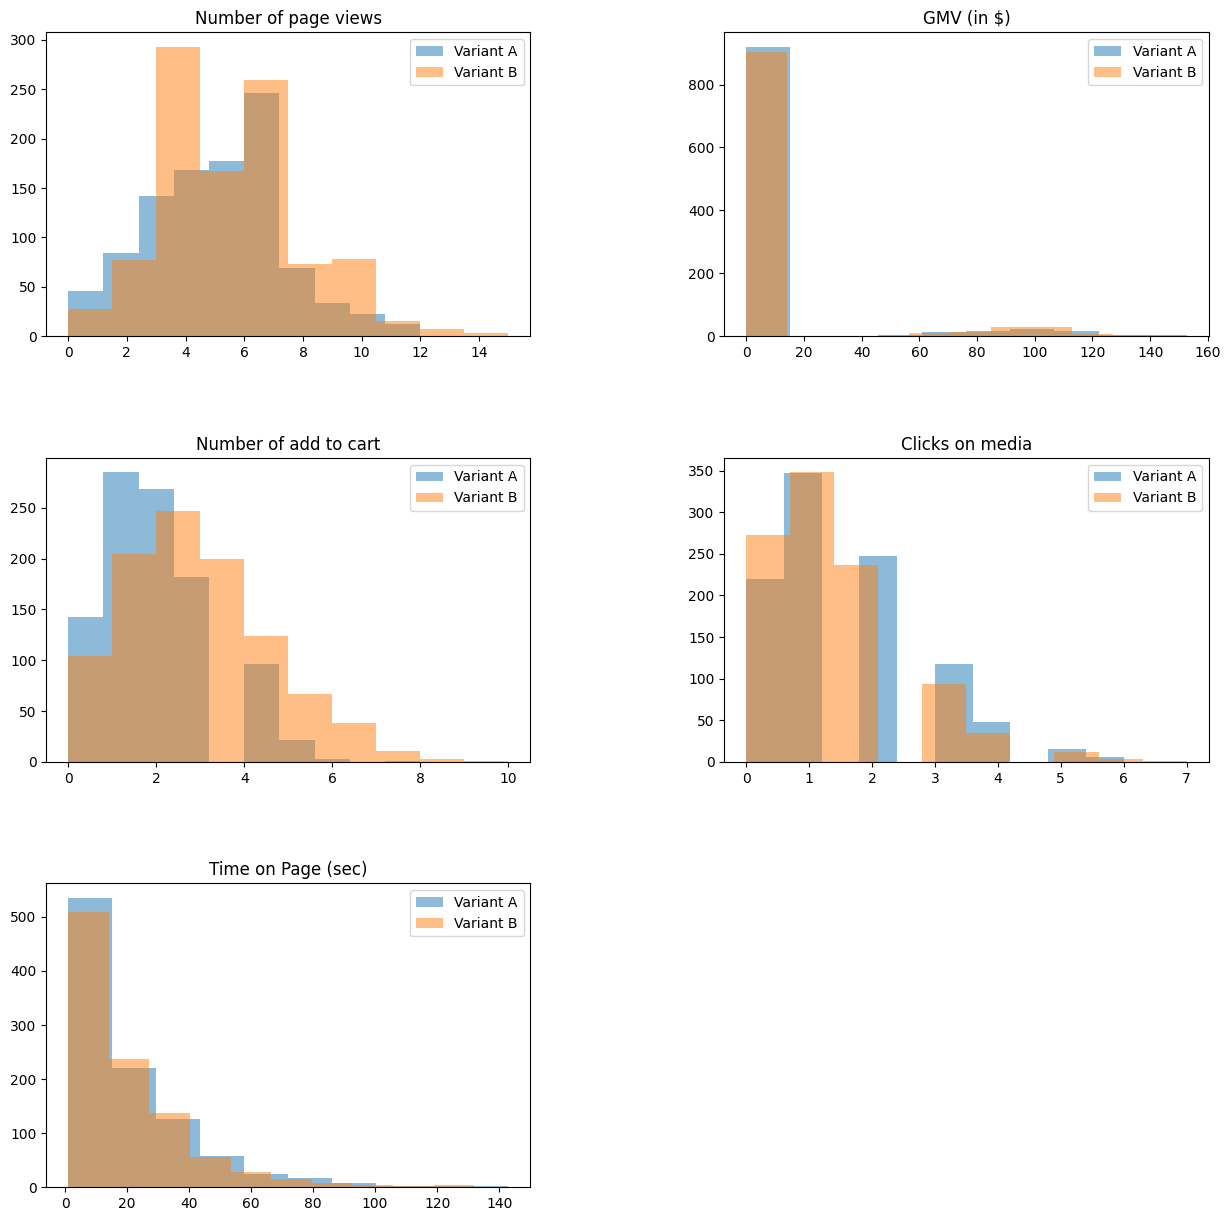

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data_path = r'C:\Users\emad\Desktop\assessment_math\asss.csv'
data = pd.read_csv(data_path)
# Define the metrics to compare
metrics_to_compare = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

# Create a figure and a set of subplots for our metrics
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Flatten the axis array for easy iteration
axs = axs.ravel()

for i, metric in enumerate(metrics_to_compare):
    # Filter data for each variant
    variant_a = data[data['Variant'] == 'A'][metric]
    variant_b = data[data['Variant'] == 'B'][metric]

    # Create histogram for each variant in the same subplot
    axs[i].hist(variant_a, alpha=0.5, label='Variant A')
    axs[i].hist(variant_b, alpha=0.5, label='Variant B')
    axs[i].set_title(metric)
    axs[i].legend(loc='upper right')

# Remove the last subplot if there's an odd number of metrics
if len(axs) > len(metrics_to_compare):
    fig.delaxes(axs[-1])

plt.show()
